# テスト

In [166]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [167]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)

    def forward(self, x):
        x1 = self.l1(x)
        return x1

data = np.array([
    [166.0, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1],
])

x = data[:, 0]
y = data[:, 1]

inputs = torch.tensor((x - x.min()) / (x.max() - x.min())).float()
labels = torch.tensor((y - y.min()) / (y.max() - y.min())).float()
n_input = 5
n_output = 5
net = Net(n_input, n_output)

outputs = net(inputs)

In [168]:
for param in net.named_parameters():
    print(param)

('l1.weight', Parameter containing:
tensor([[ 0.0914,  0.1373,  0.3804,  0.2167,  0.2582],
        [-0.1990,  0.0618, -0.2111, -0.1576, -0.1786],
        [ 0.2856,  0.0824, -0.0807, -0.1792,  0.4147],
        [ 0.1937, -0.3944, -0.3824, -0.3852, -0.1063],
        [ 0.3664,  0.4218,  0.1910, -0.0123, -0.0160]], requires_grad=True))
('l1.bias', Parameter containing:
tensor([0.3552, 0.4140, 0.4436, 0.1032, 0.1733], requires_grad=True))


In [169]:
criterion = nn.MSELoss()
loss = criterion(outputs, labels)
loss.backward()


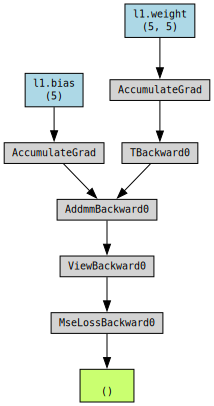

In [170]:
import torch.optim as optim
from torchviz import make_dot

lr = 0.001
optimizer = optim.SGD(net.parameters(), lr=lr)
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [171]:
optimizer.step()
optimizer.zero_grad()

In [172]:
num_epochs = 500

history = np.array((0, 2))
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels) / 2.0
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 100 == 0:
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch / Loss = {epoch} / {loss.item():.3f}')


Epoch / Loss = 0 / 0.405
Epoch / Loss = 100 / 0.362
Epoch / Loss = 200 / 0.323
Epoch / Loss = 300 / 0.289
Epoch / Loss = 400 / 0.258


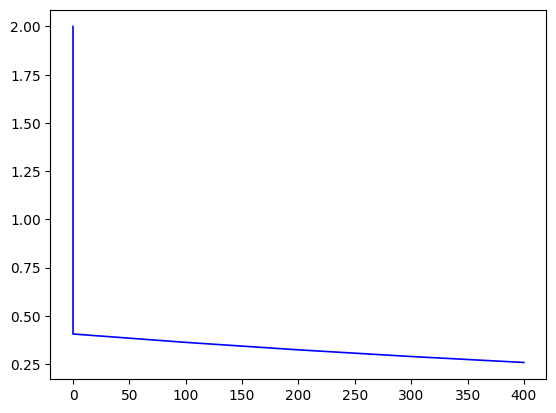

In [173]:
plt.plot(history[:, 0], history[:, 1], 'b')

In [174]:
print(f'{net.l1.weight} / {net.l1.bias}')

Parameter containing:
tensor([[ 0.0914,  0.0576,  0.3406,  0.1609,  0.2343],
        [-0.1990,  0.1312, -0.1764, -0.1090, -0.1578],
        [ 0.2856,  0.0576, -0.0931, -0.1966,  0.4072],
        [ 0.1937, -0.2657, -0.3180, -0.2951, -0.0677],
        [ 0.3664,  0.3698,  0.1650, -0.0487, -0.0316]], requires_grad=True) / Parameter containing:
tensor([0.2755, 0.4834, 0.4187, 0.2319, 0.1213], requires_grad=True)


In [175]:
ans = net.l1.weight @ inputs + net.l1.bias

#plt.scatter(inputs.data.numpy(), ans.data.numpy(), 'r')
print(inputs)
print(labels)
print(ans)

tensor([0.0000, 1.0000, 0.5000, 0.7000, 0.3000])
tensor([0.0000, 1.0000, 0.2000, 0.6882, 0.0824])
tensor([ 0.6863,  0.4027,  0.4142, -0.4198,  0.5301], grad_fn=<AddBackward0>)


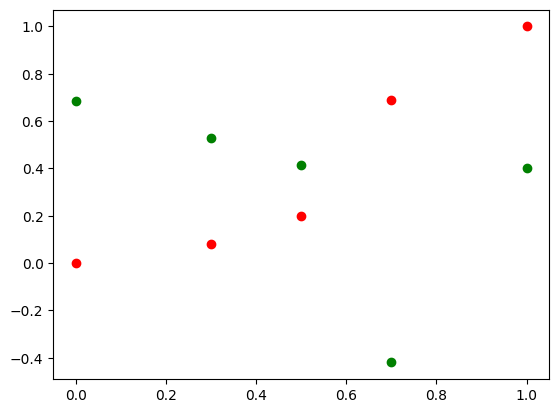

In [176]:
plt.scatter(inputs.data.numpy(), labels.data.numpy())
plt.scatter(inputs.data.numpy(), ans.data.numpy())